In [3]:
import pandas as pd 

import numpy as np§
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from IPython.display import display, Markdown 
digits = load_digits()
df_digits = pd.DataFrame(digits['data'],columns=digits['feature_names'])
df_digits = df_digits.assign(y = digits['target'])

## Evaluate the model solution 

In [5]:
def scree_plot(y,plot=True):
    
    ys, n = y/np.sum(y), y.shape[0]
    yl = np.linspace(ys[0],ys[-1],n)
    dtl = ((ys - yl)**2)**0.5
    data = pd.DataFrame(dict(y=y, ys=ys, yl=yl, dtl=dtl))
    elbow,value = data.agg(pc = ('dtl','argmax'), value = ('dtl','max')).to_numpy()
    if plot: 
        ax = data.y.cumsum().plot.bar(alpha=0.5,figsize=(12,4))
        ax.bar_label(ax.containers[0],padding=2,fontsize=10,color='k',fmt='%.2f')     
        data.y.plot.bar(ax=ax)
        data.yl.plot(ax=ax,linestyle=':')
        data.ys.plot(ax=ax,linestyle=':')
        data.dtl.plot(ax=ax,linestyle=':')
        ax.set_ylabel('Explained ratio %')
        ax.set_xlabel('PC')
        ax.plot(elbow,value,'r*')
        xlim = [-0.5,15] if n > 15 and elbow < 15 else [-0.5,n] if n < 15 else [-0.5,elbow+2]
        ax.set_xlim(*xlim)
        
    return int(elbow)

<AxesSubplot:xlabel='pc01', ylabel='pc02'>

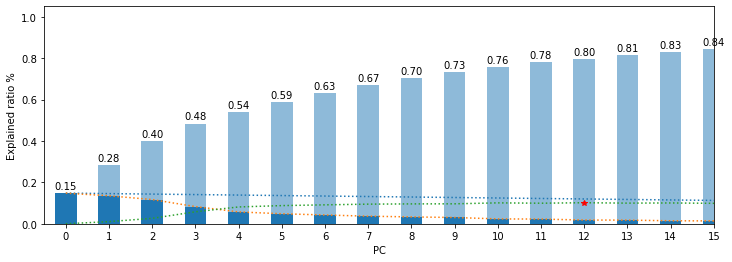

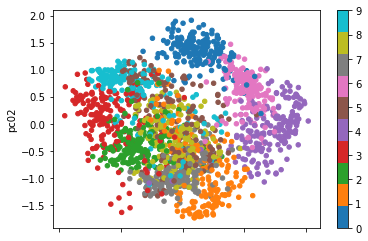

In [6]:
from sklearn.decomposition import PCA          

mdl = PCA()                      
features = df_digits.drop(columns='y').copy()
scaler = MinMaxScaler()
features_s = pd.DataFrame(scaler.fit_transform(features),columns=features.columns) # 


mdl.fit(features_s)                       

elbow = scree_plot(mdl.explained_variance_ratio_)
mdl = PCA(n_components=elbow + 1)
mdl.fit(features_s) 
digits_pc = pd.DataFrame(mdl.transform(features_s),columns = [f'pc{i+1:02}'for i in range(elbow+1)]).assign(y = df_digits.y)    
digits_pc.plot.scatter('pc01','pc02',c=df_digits.y,cmap='tab10')



## What about clustering?   
- Clustering is a strong and effective unsupervised machine learning approach and methodology that allows us to uncover subgroups in data, often known as "clusters." Clustering is classified as unsupervised learning since we are attempting to identify structure and detect undiscovered relationships between unlabelled data points in the form of separate clusters.


## Partitioning Gaussian Cows one at a time
 
Clustering is a way of partitioning observations or features into groups, or clusters. Data elements in a cluster share more similarities with one another than they do with elements from other clusters. In practice, clustering identifies the following two qualities in data:


## Meaningfulness  
Domain knowledge is expanded by meaningful clusters. Using clustering methods, we can identify/create groups of participants or features who share some medical property that is interesting to explore further. 

## Usefulness
On the other hand, useful clusters serve as intermediate steps in a data pipeline. Clustering can be used for feature segmentation, for example. As a result of clustering, features can be grouped into groups with similar behaviour, and targeted questions can be created.

# Clustering analysis objective

- For a set of elements with a common feature space, we want to group similar events based on some **distance** measure.
- Practically we need to assign a cluster label to elements that share some pattern across a feature space to partition them into groupings or clusters. 

# Clustering open questions

- What do we mean by “similar”? 
- How do we quantify similarity?
- What is a good grouping? 
- How do we choose the number of clusters? 
- Flat or hierarchical clustering?

## Major General types of clustering
- “Soft” versus “hard.” 
    - Soft = each event cluster assignment is distributed across several groups
    - Hard = each event is only assigned to one label
- Flat versus hierarchical 
    - No nested clusters
    - Clusters form a hierarchy 
- Agglomerative versus Divisive 
    - Agglomerative =  Bottom-up creation of clusters, beginning with the pairing of single events together until the final groups are formed 
    - Divisive =  Top-down formation of clusters beginning with the entire sample and dividing it to groups  based on some criteria

## What is similarity 
A measure of similarity compares two lists of numbers (i.e. vectors), and computes a single number indicating their similarity. A great deal of research has focused on the development of measures that compare pairs of variables (such as income or attitude towards abortion) across cases (such as survey participants). With other words, the goal is to determine whether two variables are co-variant, i.e., share the same values in the same cases.


## Non-distributional Distance measures
- The heart and soul of any clustering process lies in how we measure distance or (dis)similarity between events
- When dealing with continuous measures, two of the most common ways to measure magnitude differences between multivariate events are: 
    - l1-Norm (aka Manhatten distance) $d_1(x,y)= \sum^n_{i=1}|x_i-y_i|$ 
    - l2-Norm (aka Euclidean distance) $d_2(x,y) = \sqrt{\sum^n_{i=1} (x_i-y_i)^2} $
- Where **Norm** refers to the a nonnegative value quantifying the vector’s magnitude (across the n-dimensional space).
- This can be generalized to the Minkowski distance metric $d_p(x,y) = (\sum^n_{i=1} |x_i-y_i|^p)^{1/p}$ 
- The range here is 0 (no distance) and +inf 

## Correlation as the similarity between angles 
- The choice of distance measure can shape how your data is interpreted 
- In contrast to the magnitude distance measures, the distance between angles gives a different complementary measure 
- As expected this measure is not sensitive to magnitude differences but instead compares the shape similarity  
    - Pearson correlation $r_{xy} = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum^n_{i=1}(x_i-\bar{x})^2}\sqrt{\sum^n_{i=1}(y_i-\bar{y})^2}}$
    - Cosine similarity $\frac{\sum x_i y_i}{\sqrt{\sum^n_{i=1}x_i^2}\sqrt{\sum^n_{i=1}y_i^2}}$
- It is easy to see that the Cosine similarity is a special case of Pearson correlation when both means are zero 


# Correlation as the similarity between angles 
- The choice of distance measure can shape how your data is interpreted 
- In contrast to the magnitude distance measures, the distance between angles gives a different complementary measure 
- As expected this measure is not sensitive to magnitude differences but instead compares the shape similarity  
    - Pearson correlation $r_{xy} = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum^n_{i=1}(x_i-\bar{x})^2}\sqrt{\sum^n_{i=1}(y_i-\bar{y})^2}}$
    - Cosine similarity $\frac{\sum x_i y_i}{\sqrt{\sum^n_{i=1}x_i^2}\sqrt{\sum^n_{i=1}y_i^2}}$
- It is easy to see that the Cosine similarity is a special case of Pearson correlation when both means are zero 

# Let's compare these with a toy example 
- We start by generating three events with 50 features that have some predefined similarity between them


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
import seaborn as sns

rng = np.random.default_rng(2022)

plt.style.use('bmh')

In [12]:
def make_psd(M):
    # Positive Definite and Semidefinite Matrices
    # see the following to understand 
    # the concept of https://www.youtube.com/watch?v=xsP-S7yKaRA
    M = (M + M.T)/2
    eigval, eigvec = np.linalg.eig(M)
    eigval[eigval < 0] = 0
    return eigvec @ np.diag(eigval) @ eigvec.T

## Covariance vs. Correlation
Covariance and correlation both primarily assess the relationship between variables. The closest analogy to the relationship between them is the relationship between the variance and standard deviation.

Covariance measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, nor the dependency between the variables.

On the other hand, correlation measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. It is dimensionless. In other words, the correlation coefficient is always a pure value and not measured in any units.

The relationship between the two concepts can be expressed using the formula below:


$$ \rho(x,y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} $$

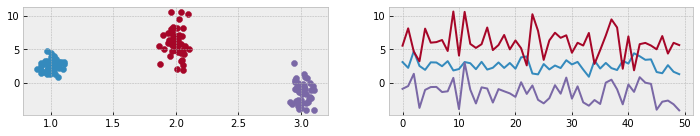

In [13]:
M = np.array([2.5,6.0,-1.6]) # center/magnitude of the signal 
S = np.array([[.6,2,1.5]])  # std/spread of the signal
R = np.array([[1.0,-0.5,0.7],[-0.5,1.0,0.5],[0.7,0.5,1.0]])
psd_cov_mat = make_psd(S * R * S)
rng = np.random.default_rng(2021)
X = rng.multivariate_normal(M,psd_cov_mat,size=50)
fig,ax = plt.subplots(1,2,figsize=(12,2))
for i in range(X.shape[1]):
    ax[0].scatter(np.ones((X.shape[0],1))+i+rng.normal(0,0.05,size=(X.shape[0],1)),
               X[:,i],label=f'V_{i+1}');
ax[1].plot(X);

# Our toy data
We created 50 observations with some predefined relationship
Now let's examine how these are expressed in the different distance measures 

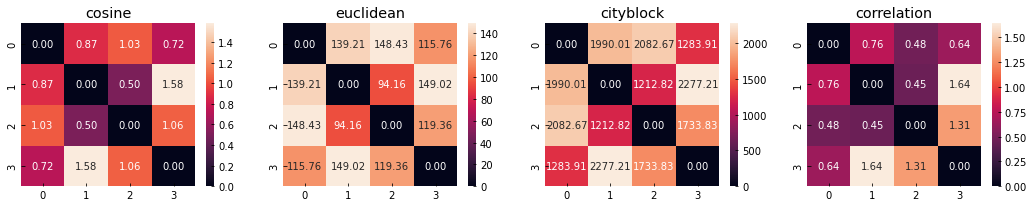

In [21]:
 def plot_pdist(X,annot=True):
    fig,ax = plt.subplots(1,4,figsize=(18,3))
    for i,dist in zip(range(4),['cosine','euclidean','cityblock','correlation']):
        sns.heatmap(squareform(pdist(X.T,metric=dist)),ax=ax[i], annot=annot, fmt="0.2f")
        ax[i].set_title(dist)

plot_pdist(X)        

Let's scale all measures to the same range and see the effect on the different distance measures

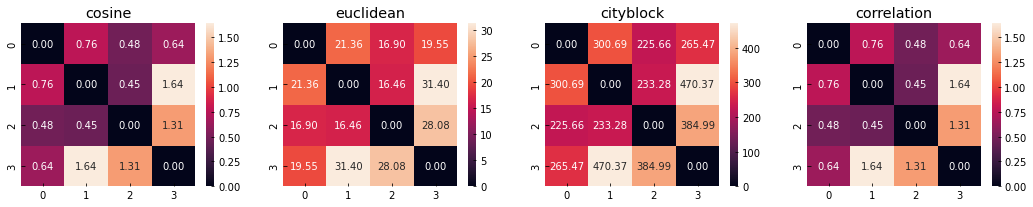

In [22]:
from sklearn import preprocessing
x_normelized = preprocessing.scale(X)
plot_pdist(x_normelized)

As you can see the correlation is the only one that is insensitive to the scale of the data, making it my preferred way of examining association (when I have strong evidence to believe a linear relationship is present)

# Overview of Clustering Techniques
You can perform clustering using many different approaches—so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data. see https://link.springer.com/content/pdf/10.1007/s40745-015-0040-1.pdf for a good overview of most of these. 

# We will examine three common clustering algorithms today

- K-means - hard clustering of events based on distance from centers ([in-depth](https://scikit-learn.org/stable/modules/clustering.html#k-means))
- GaussianMixture - soft clustering of events based on per cluster gaussian distribution ([in-depth](https://scikit-learn.org/stable/modules/mixture.html#mixture))
- Hierarchical Clustering - hard clustering of events to multiple levels of hierarchy ([in-depth](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering))

In [36]:
mdl = PCA(n_components=4)                      
features = df_digits.drop(columns='y').copy()
scaler = MinMaxScaler()
features_s = pd.DataFrame(scaler.fit_transform(features),columns=features.columns) # 
mdl.fit(features_s)                       
digit_4d = pd.DataFrame(mdl.transform(features_s),columns = [f'pc{i+1:02}'for i in range(4)])

Le't start by examining the distance metrics for the digit data 


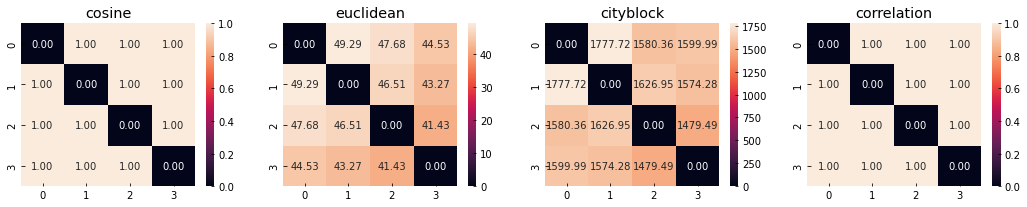

In [38]:
plot_pdist(digit_4d)
# plot_pdist(X.T,False)

In [24]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
models = {"kmn" : KMeans(n_clusters=5),
          "gmm" : GaussianMixture(n_components=5),
          "hcl" : AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')}
results = {}
for key,mdl in models.items():
    results[key] = mdl.fit(X)

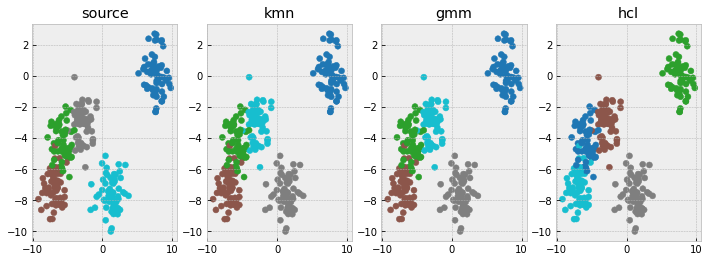

In [25]:
f, ax = plt.subplots(1,4,figsize=(12, 4)) 
ax[0].scatter(x=X[:,1], y=X[:,2],cmap='tab10', c=y)
ax[0].set_title('source')
for i,key in enumerate(models.keys()):
    labels_ = results[key].labels_ if not key=='gmm' else results[key].fit_predict(X)
    ax[i+1].scatter(x=X[:,1], y=X[:,2],cmap='tab10', c=labels_)
    ax[i+1].set_title(key)

# What is happening under the hood?

1. The K-means algorithm iteratively improves the position of centroids that minimise the within-cluster sum-of-squares criterion:
$$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$

1. The GaussianMixture model uses the expectation-maximization (EM) algorithm to fit k Gaussian models in the feature space. Each point is assigned a probability of association to all Gaussian blobs in the space. The hard assignment is achieved using some cut (usually max).

1. The Agglomerative Clustering algorithm that recursively merges each pair of clusters that minimally increases a given linkage distance. In our case we are using the ward linkage that minimizes the variance of the clusters being merged.

# What is their biggest limitation? 

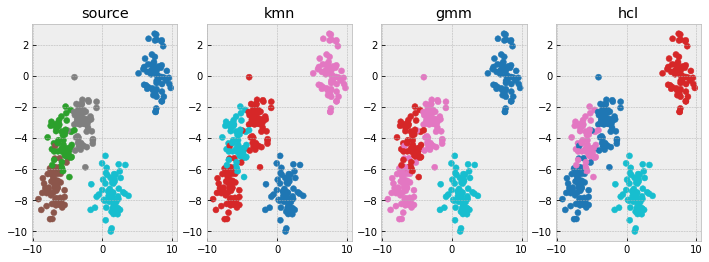

In [29]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
k = 4
models = {"kmn" : KMeans(n_clusters=k),
          "gmm" : GaussianMixture(n_components=k),
          "hcl" : AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')}
results = {}
for key,mdl in models.items():
    results[key] = mdl.fit(X)
    
    
f, ax = plt.subplots(1,4,figsize=(12, 4)) 
ax[0].scatter(x=X[:,1], y=X[:,2],cmap='tab10', c=y)
ax[0].set_title('source')
for i,key in enumerate(models.keys()):
    labels_ = results[key].labels_ if not key=='gmm' else results[key].fit_predict(X)
    ax[i+1].scatter(x=X[:,1], y=X[:,2],cmap='tab10', c=labels_)
    ax[i+1].set_title(key)    